Геометрический смысл линейной комбинации

Если точка $x (x_0,...,x_n)$ лежит на гиперплоскости, то

$w^Tx+b=0 $

А что происходит с этой суммой, если точка не лежит на плоскости?

Гиперплоскость делит гиперпространство на два гиперподпространства. Так вот точки, находящиеся в одном из этих подпространств (условно говоря «выше» гиперплоскости), и точки, находящиеся в другом из этих подпространств (условно говоря «ниже» гиперплоскости), будут в этой сумме давать разный знак:

$w^T x + b > 0$ — точка лежит «выше» гиперплоскости

$w^T x + b < 0$ — точка лежит «ниже» гиперплоскости

In [29]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np


/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_13089/301105041.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, x2, 'ro', color='red')
/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_13089/301105041.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, x2, 'ro', color='green')


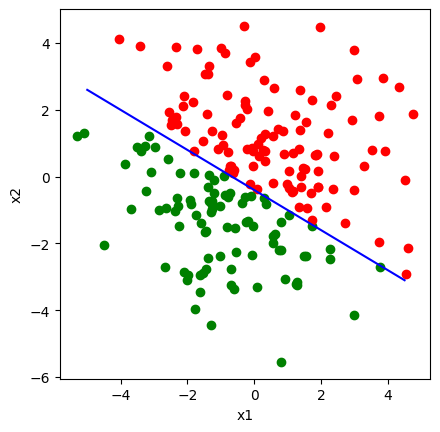

In [30]:

# наша линия: w1 * x1 + w2 * x2 + b = 0
def line(x1, x2):
    return -3 * x1 - 5 * x2 - 2

# служебная функция в форме x2 = f(x1) (для наглядности)
def line_x1(x1):
    return (-3 * x1 - 2) / 5

# генерируем диапазон точек
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:
    value = line(x1, x2)

    if (value == 0): # синие — на линии
        plt.plot(x1, x2, 'ro', color='blue')
    elif (value > 0): # зелёные — выше линии
        plt.plot(x1, x2, 'ro', color='green')
    elif (value < 0): # красные — ниже линии
        plt.plot(x1, x2, 'ro', color='red')

# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
            
# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# на экран!
plt.show()

Нужно понимать, что «выше» и «ниже» здесь — понятия условные. Это специально отражено в примере — зелёные точки оказываются визуально ниже. С геометрической точки зрения направление «выше» для данной конкретной линии определяется вектором нормали. Куда смотрит нормаль, там и верх.

 Значение (по модулю) определяет удалённость точки от плоскости:

$dist(x) = \frac{|w^Tx+b|}{||w||}$



Т.е. чем дальше от плоскости находится точка, тем больше будет значение линейной комбинации для неё. Если зафиксировать значение линейной комбинации, получим точки, лежащие на прямой, параллельной исходной.

Опять же, наблюдение важное, поэтому перепроверяем:

/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_13089/3737150327.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, x2, 'ro', color=color)


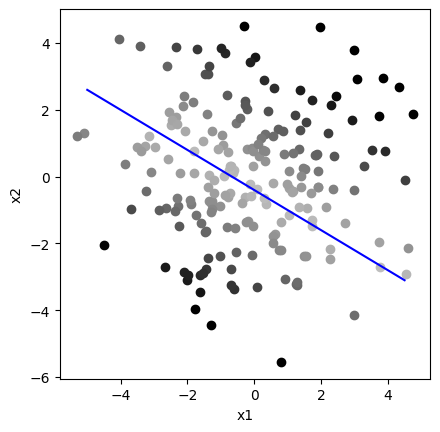

In [31]:
# генерируем диапазон точек
np.random.seed(0)
x1x2 = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:    
    value = line(x1, x2)

    # цвет тем тенее, чем меньше значение — поэтому минус
    # коэффициенты — чтобы попасть в диапазон [0, 0.75]
    # чёрный (0) — самые удалённые точки, светло-серый (0.75) — самые близкие
    color = str(max(0, 0.75 - np.abs(value) / 30))

    plt.plot(x1, x2, 'ro', color=color)
        
# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
        
# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# на экран!
plt.show()

### Выводы

Линейная комбинация позволяет разделить n-мерное пространство гиперплоскостью.
Точки по разные стороны гиперплоскости будут иметь разный знак линейной комбинации $w^Tx+b$.
Чем точка удалённее от гиперплоскости, тем абсолютное значение линейной комбинации будет больше.

С точки зрения бинарной классификации последнее утверждение можно переформулировать следующим образом. Чем удалённее точка от гиперплоскости, являющейся границей решений (decision boundary), тем увереннее мы в том, что наш образец (sample) определяемый этой точкой попадает в тот или иной класс. 

/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_13089/1470777455.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, x2, 'ro', color=color)


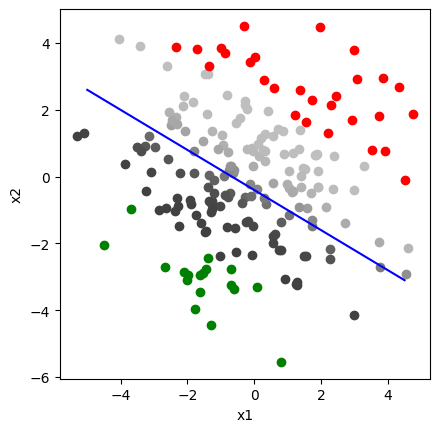

In [32]:
# логистическая функция
def logit(x):
    return 1 / (1 + np.exp(-x))

# генерируем диапазон точек
np.random.seed(0)
xy = np.random.randn(200, 2) * 2

# рисуем точки
for x1, x2 in x1x2:    
    # деление добавляется для наглядности — эдакая ручная нормализация
    value = logit(line(x1, x2) / 2)

    if (value < 0.001):
        color = 'red'
    elif (value > 0.999):
        color = 'green'
    else:
        color = str(0.75 - value * 0.5)

    plt.plot(x1, x2, 'ro', color=color)
        
# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
        
# рисуем саму линию
x1_range = np.arange(-5.0, 5.0, 0.5)
plt.plot(x1_range, line_x1(x1_range), color='blue')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# на экран!
plt.show()

Красные — точно нет (false, точно брак, точно не кликнет). Зелёные — точно да (true, точно годится, точно кликнет). Всё, что в определённом диапазоне близости от гиперплоскости (граница решений) получает некоторую вероятность. На самой прямой вероятность ровно 0.5.

P.S. «Точно» здесь определяется как меньше 0.001 или больше 0.999. Сама логистическая функция стремится к нулю на минус бесконечности и к единице на плюс бесконечности, но никогда этих значений не принимает.

N.B. Обратите внимание, что данный пример лишь демонстрирует каким образом можно ужать (squashing) расстояние со знаком в интервал вероятностей $(0, 1)$. В практических задачах для поиска оптимального отображения используется калибровка вероятностей. Например, в алгоритме шкалирования по Платту (Platt scaling) логистическая функция параметризуется:

$f(x) = \frac{1}{1 + e^{Ax + B}}$



и затем коэффициенты $A$ и $B$ подбираются машинным обучением. Подробнее смотрите: binary classifier calibration, probability calibration.

### В каком мы пространстве? (полезное умозрительное упражнение)

Казалось бы понятно — мы в пространстве данных $X$ (data space), в котором лежат образцы $x$. И ищем оптимальное разделение плоскостью, определяемой вектором $w$.

$w^T x + b > 0$ для зелёных точек
$w^T x + b < 0$ для красных точек

Но в нашей задаче бинарной классификации образцы зафиксированы, а веса меняются. Соответственно мы можем всё переиграть, перейдя в пространство весов $W$ (weight space):

$x^T w + b$

Образцы из тренировочного набора $x_1 ... x_m$ в этом случае задают $m$ гиперплоскостей и наша задача в том, чтобы найти такую точку $w$, которая бы лежала с нужной стороны от каждой плоскости. Если исходный датасет является линейно-разделимым, то такая точка найдётся.

/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_13089/2467142908.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(w1, w2, 'ro', color=color)


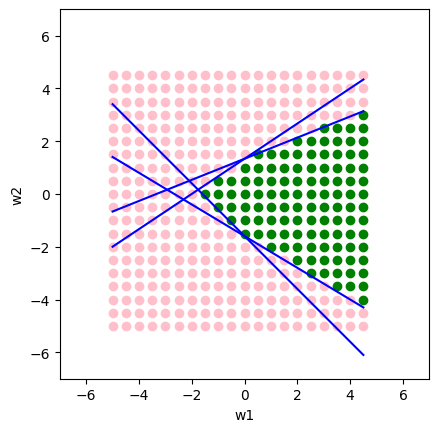

In [33]:
# образец 1
def line1(w1, w2):
    return -3 * w1 - 5 * w2 - 8

# служебная функция в форме w2 = f1(w1) (для наглядности)
def line1_w1(w1):
    return (-3 * w1 - 8) / 5

# образец 2
def line2(w1, w2):
    return 2 * w1 - 3 * w2 + 4

# служебная функция в форме w2 = f2(w1) (для наглядности)
def line2_w1(w1):
    return (2 * w1 + 4) / 3

# образец 3
def line3(w1, w2):
    return 1.2 * w1 - 3 * w2 + 4

# служебная функция в форме w2 = f2(w1) (для наглядности)
def line3_w1(w1):
    return (1.2 * w1 + 4) / 3

# образец 4
def line4(w1, w2):
    return -5 * w1 - 5 * w2 - 8

# служебная функция в форме w2 = f2(w1) (для наглядности)
def line4_w1(w1):
    return (-5 * w1 - 8) / 5

# генерируем диапазон точек
w1_range = np.arange(-5.0, 5.0, 0.5)
w2_range = np.arange(-5.0, 5.0, 0.5)

# рисуем веса (w1, w2), лежащие по нужные стороны от образцов
for w1 in w1_range:
    for w2 in w2_range:
        value1 = line1(w1, w2)
        value2 = line2(w1, w2)
        value3 = line3(w1, w2)
        value4 = line4(w1, w2)
        
        if (value1 < 0 and value2 > 0 and value3 > 0 and value4 < 0):
            color = 'green'
        else:
            color = 'pink'
        
        plt.plot(w1, w2, 'ro', color=color)

# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
            
# рисуем саму линию (гиперплоскость) для образца 1
plt.plot(w1_range, line1_w1(w1_range), color='blue')
# для образца 2
plt.plot(w1_range, line2_w1(w1_range), color='blue')
# для образца 3
plt.plot(w1_range, line3_w1(w1_range), color='blue')
# для образца 4
plt.plot(w1_range, line4_w1(w1_range), color='blue')

# рисуем только эту область — остальное не интересно
plt.axis([-7, 7, -7, 7])

# проставляем названия осей
plt.xlabel('w1')
plt.ylabel('w2')

# на экран!
plt.show()